<a href="https://colab.research.google.com/github/saumya1484/Handwriting/blob/main/Handwriting_recognition_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
from sklearn import datasets,svm
digits=datasets.load_digits()
import numpy as np


In [ ]:
print("digits.target----- :" , digits.target)

digits.target----- : [0 1 2 ... 8 9 8]


In [ ]:
#print("digits.images :\n" , digits.images)
print(digits.images[2])


[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


In [ ]:
print("historic output :" , digits.target[20:35])

historic output : [0 1 2 3 4 5 6 7 8 9 0 9 5 5 6]


In [ ]:
print("historic input :" , digits.images[0])

historic input : [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(np.shape(digits.images))

(1797, 8, 8)


In [ ]:
a1=["A","B","C","D","E"]
a2=[11,22,33,44,55]
a3=list( zip(a1,a2 ) )   
print("a3 = ", a3)
print("len(a3)=" ,len(a3))


images_and_labels = list(zip(digits.images,digits.target))
print("len(images_and_labels)" , len(images_and_labels))

a3 =  [('A', 11), ('B', 22), ('C', 33), ('D', 44), ('E', 55)]
len(a3)= 5
len(images_and_labels) 1797


index :  0 image : 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] label : 0
index :  1 image : 
 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]] label : 1
index :  2 image : 
 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]] label : 2
index :  3 image : 
 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8

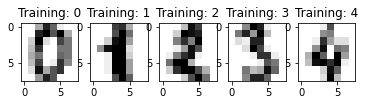

In [ ]:
for index , [image,label] in enumerate(images_and_labels[  :5]):
  print("index : ",index , "image : \n", image,"label :",label)
  plt.subplot(2 , 5, index+1)
  plt.axis('on')
  plt.imshow(image , cmap=plt.cm.gray_r,interpolation='nearest')
  plt.title('Training: %i' %label)
plt.show()

In [ ]:
n_samples = len(digits.images)
print("n_sample: " ,n_samples)

n_sample:  1797


In [ ]:
proc_imageData= digits.images.reshape(n_samples,-1)
print("After Reshaped : len(processed_imageData[0]):"  , len(proc_imageData[0]))
print("After Reshaped : len(processed_imageData):"  , len(proc_imageData))

After Reshaped : len(processed_imageData[0]): 64
After Reshaped : len(processed_imageData): 1797


In [ ]:
classifier = svm.SVC(gamma=0.001)
classifier.fit (proc_imageData [    :n_samples//2],digits.target[  :n_samples//2])
originalY = digits.target[n_samples//2:]
predictedY = classifier.predict(proc_imageData[n_samples//2:])

In [ ]:
images_and_predictions = list(zip(digits.images[n_samples//2:],predictedY))

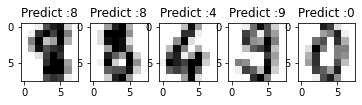

In [ ]:
for index, [image,prediction] in enumerate(images_and_predictions[:5]):
  plt.subplot(2, 5, index+6)
  plt.axis('on')
  plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
  plt.title('Predict :%i' %prediction)
plt.show()

In [ ]:
print("Original Values:" ,
     digits.target[n_samples//2 :(n_samples//2)+5])


Original Values: [8 8 4 9 0]


In [ ]:

#!pip uninstall scipy


In [ ]:
#!pip install scipy==1.2.2

In [ ]:
#!pip install Pillow==2.6.0

In [ ]:
import scipy 
print(scipy.__version__)

1.4.1


In [ ]:
from google.colab import files
uploades=files.upload()

In [ ]:
import os
!ls
print( os.getcwd())

!ls

sample_data
/content
sample_data


In [ ]:
from scipy.misc import imread, imresize, bytescale


ImportError: ignored

In [ ]:
img= imread('WhatsApp Image 2019-07-10 at 1.00.22 PM.jpeg')
img = imresize(img,(8,8))
img = img.astype(digits.images.dtype)
img = bytescale(img,high=16.0 , low=0)

In [ ]:
classifier = svm.SVC(gamma=0.001)
classifier.fit( proc_imageData[:], digits.target[:])
print("img.shape" ,img.shape)

In [ ]:
print("/n" , img)
x_testData  = []
for row in img:
  for col in row:
    x_testData.append(sum(col)/3.0)
print("x_testData : \n",x_testData)

print("len(x_testData) :" ,len(x_testData))
      

In [ ]:
x_testData = [x_testData]
print( "len(x_testData) : ",len(x_testData))
print("Machine Output=" ,classifier.predict(x_testData))
plt.show()